In [2]:
pip freeze

absl-py==1.4.0
accelerate==1.3.0
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
astunparse==1.6.3
attrs==25.1.0
audioread==3.0.1
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bleach==6.2.0
blinker==1.4
blis==0.7.11
cachetools==5.5.1
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
chex==0.1.88
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
confection==0.1.5
contourpy==1.3.1
cramjam==2.9.1
cryptography==44.0.1
cycler==0.12.1
cymem==2.0.11
dbus-python==1.2.18
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
distrax==0.1.5
distro==1.7.0
dm-tree==0.1.9
dnspython==2.7.0
docstring_parser==0.16
dopamine_rl==4.1.2
email_validator==2.2.0
en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl#sha256=86cc141f63942d4b2c5fcee06630fd6f904788d2f0ab005cce45aadb8fb73889
entrypoints==0.4
eti

In [21]:
#importing necessary packages
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [3]:
#Empty lists to store image data and labels
data=[]
labels=[]

train_folder_list= os.listdir("/content/drive/MyDrive/trafficSignRecog data/archive/Train")
#iterating through folders in Train
for folder in train_folder_list:
  files= os.listdir("/content/drive/MyDrive/trafficSignRecog data/archive/Train/"+folder)
  for file in files:
    #opening the images; convertion to arrays
    img= Image.open("/content/drive/MyDrive/trafficSignRecog data/archive/Train/"+folder+"/"+file)
    img= img.resize((30,30))
    img= np.array(img)
    data.append(img)
    labels.append(folder)
labels

['32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',
 '32',

In [5]:
#convertion to np arrays
data= np.array(data)
labels= np.array(labels)

In [6]:
data.shape, labels.shape

((39209, 30, 30, 3), (39209,))

In [7]:
#splitting data into train and test
X_train, X_test, y_train, y_test= train_test_split(data,labels, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

In [8]:
#convertion of labels to categorical
y_train= to_categorical(y_train, num_classes=43)
y_test= to_categorical(y_test, num_classes=43)

In [9]:
#model building
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

#compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#model training
epochs= 15
history= model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.2924 - loss: 3.3756 - val_accuracy: 0.8828 - val_loss: 0.5609
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7470 - loss: 0.8752 - val_accuracy: 0.9237 - val_loss: 0.3027
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8437 - loss: 0.5358 - val_accuracy: 0.9637 - val_loss: 0.1408
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8822 - loss: 0.4062 - val_accuracy: 0.9723 - val_loss: 0.0952
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8969 - loss: 0.3434 - val_accuracy: 0.9760 - val_loss: 0.0826
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9124 - loss: 0.3074 - val_accuracy: 0.9795 - val_loss: 0.0746
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9232 - loss: 0.2801 - val_accuracy: 0.9806 - val_loss: 0.0754
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9220 - loss: 0.2761 - val_accuracy: 

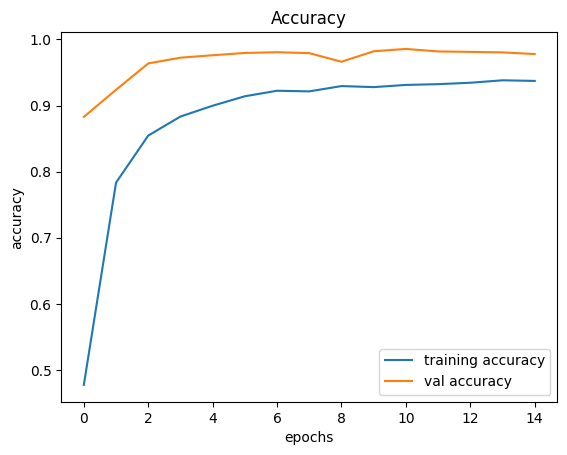

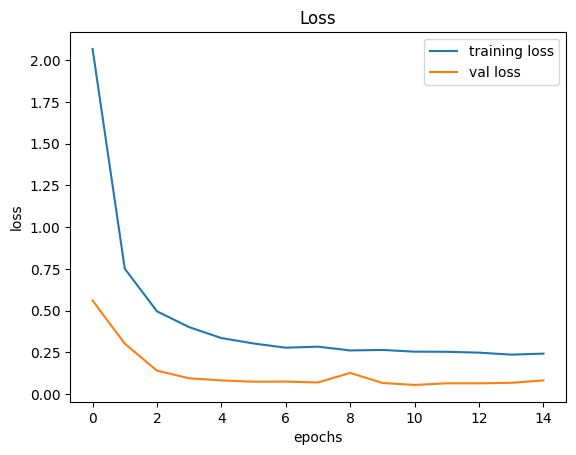

In [14]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
data=[]
df= pd.read_csv("/content/drive/MyDrive/trafficSignRecog data/archive/Test.csv")

labels= df["ClassId"].values
imgs= df["Path"].values

with tf.device('/GPU:0'):
  for img in imgs:
    image= Image.open("/content/drive/MyDrive/trafficSignRecog data/archive/"+img)
    image= image.resize((30,30))
    data.append(np.array(image))

X_test= np.array(data)
with tf.device('/GPU:0'):
  pred= np.argmax(model.predict(X_test), axis=-1)

print(accuracy_score(labels, pred))